In [113]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [114]:
df = pd.read_table('cmu_dataset/movie.metadata.tsv', names=['Wikipedia_ID', 'Freebase_ID', 'Name', 'Release_Date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])

In [115]:
df.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [116]:
def remove_id(s):
    res = ast.literal_eval(s)
    val = list(res.values())[:]
    return str(val)

def remove_language(s, pattern=' language'):
    s = ast.literal_eval(s)
    lang_clean=[]
    for lang in s:
        lang = lang.lower()
        lang_clean.append(str(lang).replace(pattern, ''))
    return str(lang_clean)

def remove_special_character(s):
    s = ast.literal_eval(s)
    tup_s = str(tuple(s))
    s = re.sub("[()']", '', tup_s)
    s = s.rstrip(',')
    s = s.lower()
    return str(s)



"""
test = str(['Thriller'])
print(remove_special_character(test))
print(len(remove_special_character(test)))

test = str(['English Language', 'Norwegian Language'])
print(test)
print(remove_language(test))
"""

"\ntest = str(['Thriller'])\nprint(remove_special_character(test))\nprint(len(remove_special_character(test)))\n\ntest = str(['English Language', 'Norwegian Language'])\nprint(test)\nprint(remove_language(test))\n"

In [117]:
df_copy = df.copy(deep=True)
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_id(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_language(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_special_character(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_id(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_special_character(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_id(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_special_character(x))

In [118]:
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,german,germany,drama


In [119]:
#pd.set_option("display.max_rows", None)
df_copy.value_counts("Languages")

Languages
english                                                                  33748
                                                                         13866
hindi                                                                     3093
spanish                                                                   2633
silent film, english                                                      2297
                                                                         ...  
vietnamese, korean                                                           1
vietnamese, standard cantonese, english, standard mandarin, cantonese        1
vietnamese, standard cantonese, standard mandarin, english, cantonese        1
vietnamese, standard mandarin                                                1
vietnamese, standard mandarin, mandarin chinese                              1
Name: count, Length: 1814, dtype: int64

In [120]:
#df_copy = df_copy[df_copy['Revenue'].notna()]

#print(f"Length before removing Nan in Revenue column {len(df)}")
#print(f"Length after removing Nan in Revenue {len(df_copy)}")

#reduction = (len(df) - len(df_copy))/len(df)

#print(f"Data reduction of {reduction:.2%}")

In [121]:
df_copy.value_counts("Countries")

Countries
united states of america                                                            5484
united states of america, united kingdom                                             329
south korea                                                                          253
united kingdom                                                                       177
united states of america, germany                                                    174
                                                                                    ... 
united states of america, spain, italy, argentina                                      1
united states of america, south africa, new zealand                                    1
united states of america, south africa, united kingdom, germany                        1
united states of america, soviet union                                                 1
united states of america, united kingdom, germany, finland, ireland, netherlands       1
Name: count

In [122]:
countries_counts = df_copy['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 100
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")

Total number of countries : 147
Number of countries with more than 100 counts : 53


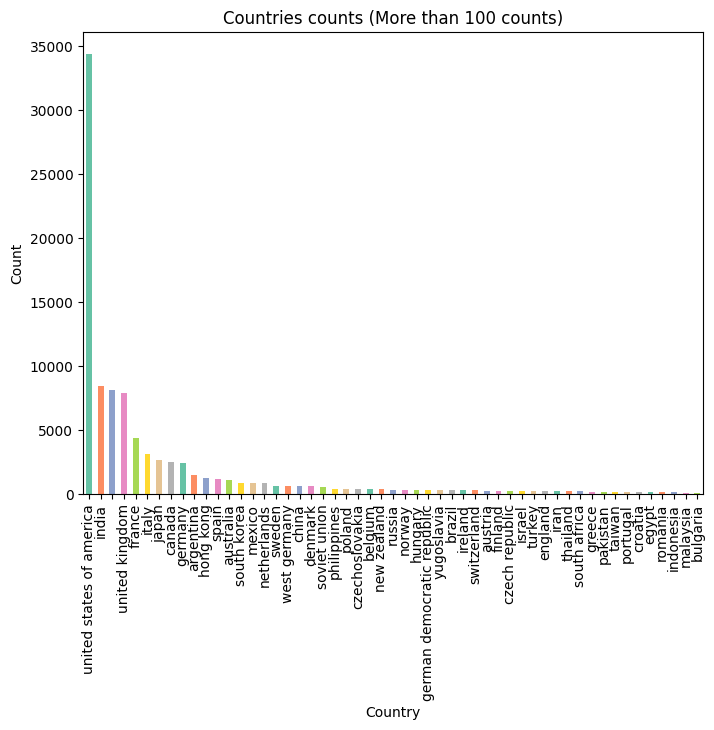

In [123]:
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [124]:
languages_counts = df_copy['Languages'].str.split(', ').explode().value_counts()
print(f"Total number of languages : {len(languages_counts)}")

count_threshold = 40
filt_languages_counts = languages_counts[languages_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_languages_counts)}")

Total number of languages : 211
Number of countries with more than 40 counts : 61


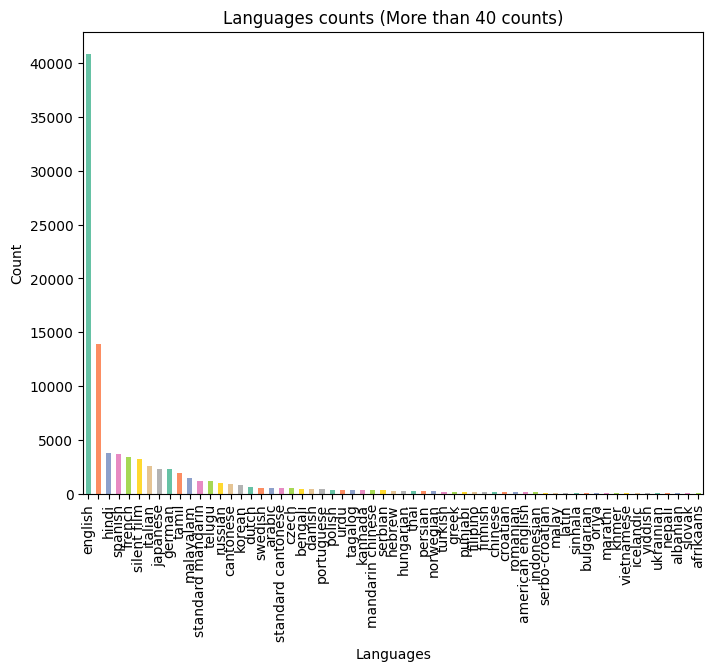

In [125]:
colors = sns.color_palette("Set2", len(filt_languages_counts))
plt.figure(figsize=(8, 6))
filt_languages_counts.plot(kind='bar', color=colors)
plt.title(f'Languages counts (More than {count_threshold} counts)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.show()

In [126]:
def keep_year(s):
    s = str(s)
    #print(s)
    if s == 'nan': 
        #print('yea')
        return
    #print(type(int(s[:4])))
    return int(s[:4])

def filter_year(year):
    if year < 1800:
        return False
    return True


"""
test = "2005-09-09"

print(keep_year(test))
"""

'\ntest = "2005-09-09"\n\nprint(keep_year(test))\n'

In [127]:
#df_copy = df_copy[df_copy['Release_Date'].notna()]
df_copy.Release_Date = df_copy.Release_Date.apply(lambda x: keep_year(x))
df_copy = df_copy[df_copy['Release_Date'].apply(lambda x: filter_year(x))]
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,german,germany,drama


In [128]:
print(f"Minimum year is {df_copy.Release_Date.min()}")
print(f"Maximum year is {df_copy.Release_Date.max()}")

Minimum year is 1888.0
Maximum year is 2016.0


In [129]:
print(f"Minimum revenue is {df_copy.Revenue.min()}")
print(f"Maximum revenue is {df_copy.Revenue.max()}")

Minimum revenue is 10000.0
Maximum revenue is 2782275172.0


In [130]:
df_copy = df_copy.drop('Wikipedia_ID', axis=1)
df_copy = df_copy.drop('Runtime', axis=1)
#df_copy = df_copy.drop('Genres', axis=1)
df_copy.head()

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,Genres
0,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,english,united states of america,"mystery, biographical film, drama, crime drama"
2,/m/0crgdbh,Brun bitter,1988.0,NaN,norwegian,norway,"crime fiction, drama"
3,/m/0285_cd,White Of The Eye,1987.0,NaN,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983.0,NaN,german,germany,drama


In [131]:
print(len(df_copy))

81740


In [132]:
df_copy.to_csv('../../data/cmu_cleaned.csv', index=False)

In [ ]:
# importing the module 
import ast 

# reading the data from the file 
with open('cmu_dataset/tvtropes.clusters.txt') as f: 
    data = f.read() 

print(f)
print("Data type before reconstruction : ", type(data)) 
      
# reconstructing the data as a dictionary 
#d = ast.literal_eval(data) 
  
#print("Data type after reconstruction : ", type(d)) 
#print(d) 

<_io.TextIOWrapper name='cmu_dataset/tvtropes.clusters.txt' mode='r' encoding='utf-8'>
Data type before reconstruction :  <class 'str'>


In [163]:
df_tropes = pd.read_table('cmu_dataset/tvtropes.clusters.txt', header=None)

big_dict=[]

for i in range(10):
    d = ast.literal_eval(df_tropes.iloc[i][1])
    df_converted = pd.DataFrame(d, index=[df_tropes.iloc[i][0]])
    big_dict.append(df_converted)
#df_tropes.head()

#d2 = ast.literal_eval(df_tropes.iloc[1][1]) 
#print("Data type after reconstruction : ", type(d)) 

#df_converted2 = pd.DataFrame(d2, index=[df_tropes.iloc[1][0]])
#print(df_converted)

#big_dict = [df_converted, df_converted2]
frames = big_dict

result = pd.concat(frames)
print(result)
df_copy.to_csv('../../data/result_tropes.csv', index=False)

                                               char  \
absent_minded_professor   Professor Philip Brainard   
absent_minded_professor          Professor Keenbean   
absent_minded_professor          Dr. Reinhardt Lane   
absent_minded_professor          Dr. Harold Medford   
absent_minded_professor              Daniel Jackson   
adventurer_archaeologist              Indiana Jones   
adventurer_archaeologist              Indiana Jones   
adventurer_archaeologist              Indiana Jones   
adventurer_archaeologist  Evelyn Carnahan-O'Connell   
arrogant_kungfu_guy                             Han   

                                                                      movie  \
absent_minded_professor                                             Flubber   
absent_minded_professor                                         Richie Rich   
absent_minded_professor                                          The Shadow   
absent_minded_professor                                               Them!   

## Add columns for gross, local budget using movie_budjets
github: https://github.com/ntdoris/movie-revenue-analysis/tree/main 
in case interested in other files such as ratings, reviews, and other info

In [472]:
df_cleaned = df_copy.copy(deep=True)

In [473]:
## dataset more cleaned and with additional column production budget
df_movie_budgets = pd.read_csv('movie-revenue-analysis/zippedData/tn.movie_budgets.csv.gz')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [474]:
## less cleaed datset with missing one column, but comprises some other movies
df_movie_gross = pd.read_csv('movie-revenue-analysis/zippedData//bom.movie_gross.csv.gz')
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Manipulating

In [475]:
## DATA CLEANING FOR df_movie_budgets
# Remove dollar signs and commas, and convert columns to numeric
df_movie_budgets['production_budget'] = pd.to_numeric(df_movie_budgets['production_budget'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['domestic_gross'] = pd.to_numeric(df_movie_budgets['domestic_gross'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['worldwide_gross'] = pd.to_numeric(df_movie_budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True))

df_movie_budgets = df_movie_budgets.rename(columns={'movie': 'Name', 'production_budget': 'Budget', 'release_date': 'Year'})
df_movie_budgets['Name'] = df_movie_budgets['Name'].str.strip().str.lower()

# Convert the release_date column to datetime
df_movie_budgets['Year'] = pd.to_datetime(df_movie_budgets['Year'], errors='coerce')
# Extract the year and assign it as an integer
df_movie_budgets['Year'] = df_movie_budgets['Year'].dt.year

df_movie_budgets['foreign_gross'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['domestic_gross']
df_movie_budgets.replace(0, np.nan, inplace=True)

df_movie_budgets.drop(columns = ['id'], inplace= True)
df_movie_budgets = df_movie_budgets[['Name', 'Year', 'Budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross']]

df_movie_budgets

,Name,Year,Budget,domestic_gross,foreign_gross,worldwide_gross
0,avatar,2009,425000000,760507625.0,2.015838e+09,2.776345e+09
1,pirates of the caribbean: on stranger tides,2011,410600000,241063875.0,8.046000e+08,1.045664e+09
2,dark phoenix,2019,350000000,42762350.0,1.070000e+08,1.497624e+08
3,avengers: age of ultron,2015,330600000,459005868.0,9.440081e+08,1.403014e+09
4,star wars ep. viii: the last jedi,2017,317000000,620181382.0,6.965404e+08,1.316722e+09
...,...,...,...,...,...,...
5777,red 11,2018,7000,NaN,NaN,NaN
5778,following,1999,6000,48482.0,1.920130e+05,2.404950e+05
5779,return to the land of wonders,2005,5000,1338.0,NaN,1.338000e+03
5780,a plague so pleasant,2015,1400,NaN,NaN,NaN


In [476]:
# DATA CLEANING FOR df_movie_gross
df_movie_gross = df_movie_gross.rename(columns={'title': 'Name', 'year': 'Year'})
# added the column producion budget with NaN values 
df_movie_gross['Budget'] = [ np.nan for i in range(len(df_movie_gross))]
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')
df_movie_gross['worldwide_gross'] = df_movie_gross['domestic_gross'] + df_movie_gross['foreign_gross']
df_movie_gross.drop(columns = ['studio'], inplace= True)
df_movie_gross['Name'] = df_movie_gross['Name'].str.strip().str.lower()

df_movie_gross = df_movie_gross[['Name', 'Year', 'Budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross']]

df_movie_gross

,Name,Year,Budget,domestic_gross,foreign_gross,worldwide_gross
0,toy story 3,2010,NaN,415000000.0,652000000.0,1.067000e+09
1,alice in wonderland (2010),2010,NaN,334200000.0,691300000.0,1.025500e+09
2,harry potter and the deathly hallows part 1,2010,NaN,296000000.0,664300000.0,9.603000e+08
3,inception,2010,NaN,292600000.0,535700000.0,8.283000e+08
4,shrek forever after,2010,NaN,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...,...,...
3382,the quake,2018,NaN,6200.0,NaN,NaN
3383,edward ii (2018 re-release),2018,NaN,4800.0,NaN,NaN
3384,el pacto,2018,NaN,2500.0,NaN,NaN
3385,the swan,2018,NaN,2400.0,NaN,NaN


In [477]:
# CREATE A DATASET THAT COMBINES THE INFO OF BOTH MOVIE GROSS AND MOVIE BUDGETS

# Perform an outer merge on 'Name', keeping all movies from both DataFrames
df_combined = pd.merge(
    df_movie_gross,
    df_movie_budgets,
    on='Name',
    how='outer',
    suffixes=('_gross', '_budgets')
)

# Fill missing values in columns from df_movie_budgets with values from df_movie_gross
df_combined['Year'] = df_combined['Year_budgets'].combine_first(df_combined['Year_gross'])
df_combined['Budget'] = df_combined['Budget_budgets'].combine_first(df_combined['Budget_gross'])
df_combined['domestic_gross'] = df_combined['domestic_gross_budgets'].combine_first(df_combined['domestic_gross_gross'])
df_combined['foreign_gross'] = df_combined['foreign_gross_budgets'].combine_first(df_combined['foreign_gross_gross'])
df_combined['worldwide_gross'] = df_combined['worldwide_gross_budgets'].combine_first(df_combined['worldwide_gross_gross'])

# Drop the extra columns created during the merge
df_combined.drop(columns=['Year_gross', 'Year_budgets', 'Budget_budgets', 'domestic_gross_budgets', 'foreign_gross_budgets', 'worldwide_gross_budgets', 
                          'Budget_gross', 'domestic_gross_gross', 'foreign_gross_gross', 'worldwide_gross_gross'], inplace=True)

# Display the first few rows to verify the result
df_combined



,Name,Year,Budget,domestic_gross,foreign_gross,worldwide_gross
0,#horror,2015.0,1500000.0,NaN,NaN,NaN
1,'71,2015.0,NaN,1300000.0,355000.0,1.655000e+06
2,(500) days of summer,2009.0,7500000.0,32425665.0,2013395.0,3.443906e+07
3,"1,000 times good night",2014.0,NaN,53900.0,NaN,NaN
4,10 cloverfield lane,2016.0,5000000.0,72082999.0,36203423.0,1.082864e+08
...,...,...,...,...,...,...
7886,zootopia,2016.0,150000000.0,341268248.0,678161368.0,1.019430e+09
7887,zulu,2013.0,16000000.0,NaN,1844228.0,1.844228e+06
7888,zwartboek,2007.0,22000000.0,4398532.0,22839822.0,2.723835e+07
7889,ã l\'intã©rieur,2008.0,3000000.0,NaN,895932.0,8.959320e+05


In [478]:
# Group by 'Name' and aggregate with first, which picks the first non-NaN value, 
# to combine duplicated rows
df_combined = df_combined.groupby('Name', as_index=False).agg(
    {
        'Year': 'first',  # Keep the first non-NaN Year
        'Budget': 'first',  # Keep the first non-NaN Budget
        'domestic_gross': 'first',  # Keep the first non-NaN domestic_gross
        'foreign_gross': 'first',  # Keep the first non-NaN foreign_gross
        'worldwide_gross': 'first'  # Keep the first non-NaN worldwide_gross
    }
)


In [494]:
df_combined

,Name,Year,Budget,domestic_gross,foreign_gross,worldwide_gross
0,#horror,2015.0,1500000.0,NaN,NaN,NaN
1,'71,2015.0,NaN,1300000.0,355000.0,1.655000e+06
2,(500) days of summer,2009.0,7500000.0,32425665.0,2013395.0,3.443906e+07
3,"1,000 times good night",2014.0,NaN,53900.0,NaN,NaN
4,10 cloverfield lane,2016.0,5000000.0,72082999.0,36203423.0,1.082864e+08
...,...,...,...,...,...,...
7801,zootopia,2016.0,150000000.0,341268248.0,678161368.0,1.019430e+09
7802,zulu,2013.0,16000000.0,NaN,1844228.0,1.844228e+06
7803,zwartboek,2007.0,22000000.0,4398532.0,22839822.0,2.723835e+07
7804,ã l\'intã©rieur,2008.0,3000000.0,NaN,895932.0,8.959320e+05


In [480]:
# # MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT
# df_cleaned['Name'] = df_cleaned['Name'].str.strip().str.lower()

# # Merge combined data with domestic_gross and production budget info with the cleaned original data
# df_cleaned_with_budget = pd.merge(
#     df_cleaned,
#     df_combined[['Name', 'production_budget', 'domestic_gross', 'worldwide_gross']],
#     left_on='Name',
#     right_on='Name',
#     how='left'
# )

# print(f"Number of movies with budget information added: {df_cleaned_with_budget['production_budget'].notna().sum()}")
# df_cleaned_with_budget.head()

In [481]:
# print(f"Number of rows before cleaning: {len(df_cleaned_with_budget)}")
# df_cleaned_with_budget_drop = df_cleaned_with_budget.dropna()
# print(f"Number of rows after cleaning: {len(df_cleaned_with_budget_drop)}")


In [482]:
# df_cleaned_with_budget_drop.head()
## NOTA: THE WORLD_WIDE GROSS AND THE REVENUE SHOULD BE THE SAME BUT THEY ARE NOT ALWAYS THE SAME ?!?!?

# Add Indian Movies Dataset

https://www.kaggle.com/datasets/hammadjavaid/highest-grossing-indian-movies-2023?resource=download
Highest grossing Indian movies from 2000-2023

In [483]:
df_indian = pd.read_csv('Indian_dataset/Highest grossing Indian movies.csv')
df_indian.head()

,Film,Year,Director,Studio(s),Budget (est.),World wide gross (INR),World wide gross (USD),Gross in India (INR crore),Primary Language
0,Dangal,2016,Nitesh Tiwari,Aamir Khan Productions\nUTV Motion Pictures\nW...,₹70 crore,"₹2,024 crore",317.00,538.03,Hindi
1,Baahubali 2: The Conclusion,2017,S. S. Rajamouli,Arka Media Works,₹250 crore,"₹1,810.60 crore",217.27,1416.9,Telugu\nTamil
2,RRR *,2022,S. S. Rajamouli,DVV Entertainments,₹550 crore,"₹1,316 crore",157.92,944,Telugu
3,K.G.F: Chapter 2,2022,Prashanth Neel,Hombale Films,₹100 crore,"₹1,225",147.00,"1,008",Kannada
4,Pathaan,2023,Siddharth Anand,Yash Raj Films,₹250 crore,"₹1,050.3 crore",130.00,654.28,Hindi


In [484]:
# drop useless columns, get rid of crore
df_indian.drop(columns = ['Director', 'Studio(s)', 'Budget (est.)', 'World wide gross (USD)'], inplace= True)
df_indian['World wide gross (INR)'] = pd.to_numeric(
    df_indian['World wide gross (INR)']
    .str.replace('[₹,]', '', regex=True)    # Remove ₹ and comma
    .str.replace(' crore', '', regex=True)   # Remove 'crore'
)
df_indian['Gross in India (INR crore)'] = pd.to_numeric(df_indian['Gross in India (INR crore)'].str.replace('[₹,]', '', regex=True))

df_indian = df_indian.rename(columns={
    'Film': 'Name', 
    'Gross in India (INR crore)': 'Gross in India (INR)',
    'Primary Language': 'Languages'})
df_indian['Name'] = df_indian['Name'].str.strip().str.lower()

df_indian['World wide gross (INR)'] = df_indian['World wide gross (INR)'] * 10000
df_indian['Gross in India (INR)'] = df_indian['Gross in India (INR)'] * 10000


In [485]:
# Manual replacements of NaN values

df_indian.loc[df_indian['Name'] == 'brahmāstra: part one – shiva', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'chennai express', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'World wide gross (INR)'] = 0#412619769
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'Gross in India (INR)'] = 0#312437220
df_indian.loc[df_indian['Name'] == 'hindi medium', 'World wide gross (INR)'] = 0#2896854886
df_indian.loc[df_indian['Name'] == 'hindi medium', 'Gross in India (INR)'] = 0#670540311

df_indian['Year'] = df_indian['Year'].replace(2911, 2011)

df_na = df_indian[df_indian.isna().any(axis=1)]
df_na

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN
...,...,...,...,...,...,...
100,race 2,2013,1733600.0,1395100.0,Hindi,NaN
101,bala,2019,1714900.0,1390600.0,Hindi,NaN
102,bhaag milkha bhaag,2013,1699600.0,1512900.0,Hindi,NaN
103,ek villain,2014,1696200.0,1466900.0,Hindi,NaN


In [486]:
# Add foreign and percentage columns

df_indian['Foreign Gross (INR)'] = df_indian['World wide gross (INR)'] - df_indian['Gross in India (INR)']
df_indian['foreign_percentage'] = df_indian['Foreign Gross (INR)']/df_indian['World wide gross (INR)']
df_indian['domestic_percentage'] = df_indian['Gross in India (INR)']/df_indian['World wide gross (INR)']

df_indian.head()

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language,Foreign Gross (INR),foreign_percentage,domestic_percentage
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN,14859700.0,0.734175,0.265825
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN,3937000.0,0.217442,0.782558
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN,3720000.0,0.282675,0.717325
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN,2170000.0,0.177143,0.822857
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN,3960200.0,0.377054,0.622946


In [487]:
# Convert to USD based on the conversion rate of that year
# Manually found from https://www.bookmyforex.com/blog/1-usd-inr-1947-till-now/

# Initialize the DataFrame with years from 2000 to 2023
years = list(range(2000, 2024))
conversion_rates = [None] * len(years)  # Placeholder for manual input

# Create the DataFrame
df_conversion_rates = pd.DataFrame({
    'convert_year': years,
    'Conversion Rate (INR to USD)': conversion_rates
})

# Define the list of conversion rates for each year
conversion_rates = [
    44.94, 47.19, 48.61, 46.58, 45.32,  # Rates for 2000-2004
    44.10, 45.31, 41.35, 43.51, 48.41,  # Rates for 2005-2009
    45.73, 46.67, 53.44, 56.57, 62.33,  # Rates for 2010-2014
    62.97, 66.46, 67.79, 70.09, 70.39,  # Rates for 2015-2019
    76.38, 74.57, 81.35, 81.94          # Rates for 2020-2023
]

# Assign the list of conversion rates to the DataFrame
df_conversion_rates['Conversion Rate (INR to USD)'] = conversion_rates

# Merge df_indian with df_conversion_rates on the 'Year' column
df_indian = pd.merge(
    df_indian, df_conversion_rates,
    left_on='Year', right_on='convert_year',
    how='left'
)

# Convert to USD by dividing INR by the conversion rate
df_indian['worldwide_gross'] = (df_indian['World wide gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['domestic_gross'] = (df_indian['Gross in India (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['foreign_gross'] = (df_indian['Foreign Gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)

df_indian = df_indian.drop(columns=['World wide gross (INR)', 'Gross in India (INR)', 'Foreign Gross (INR)', 'Conversion Rate (INR to USD)', 'convert_year'])

In [488]:
df_indian['Countries'] = 'india'
df_indian['Languages'] = df_indian['Languages'].str.replace('[\n$,]', ' ', regex=True).str.lower()
df_indian = df_indian[['Name', 'Year', 'Countries', 'Languages', 'domestic_gross', 'domestic_percentage', 
                       'foreign_gross', 'foreign_percentage', 'worldwide_gross']]

df_indian

,Name,Year,Countries,Languages,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,dangal,2016,india,hindi,80955,0.265825,223588,0.734175,304544
1,baahubali 2: the conclusion,2017,india,telugu tamil,209013,0.782558,58076,0.217442,267089
2,rrr *,2022,india,telugu,116041,0.717325,45728,0.282675,161770
3,k.g.f: chapter 2,2022,india,kannada,123909,0.822857,26674,0.177143,150583
4,pathaan,2023,india,hindi,79848,0.622946,48330,0.377054,128179
...,...,...,...,...,...,...,...,...,...
100,race 2,2013,india,hindi,24661,0.804742,5983,0.195258,30645
101,bala,2019,india,hindi,19755,0.810893,4607,0.189107,24362
102,bhaag milkha bhaag,2013,india,hindi,26743,0.890151,3300,0.109849,30044
103,ek villain,2014,india,hindi,23534,0.864815,3678,0.135185,27213


Preliminary Analysis On India only

In [489]:
year_min = df_indian['Year'].min()
year_max = df_indian['Year'].max()
print(f"Year range: {year_min} - {year_max}")

# Count the number of movies per year
movies_per_year = df_indian.groupby('Year').size()

# Display the result
print(movies_per_year)

Year range: 2008 - 2023
Year
2008     1
2009     1
2010     3
2011     5
2012     8
2013     7
2014     9
2015     5
2016     8
2017    12
2018    14
2019    16
2020     1
2021     3
2022     6
2023     6
dtype: int64


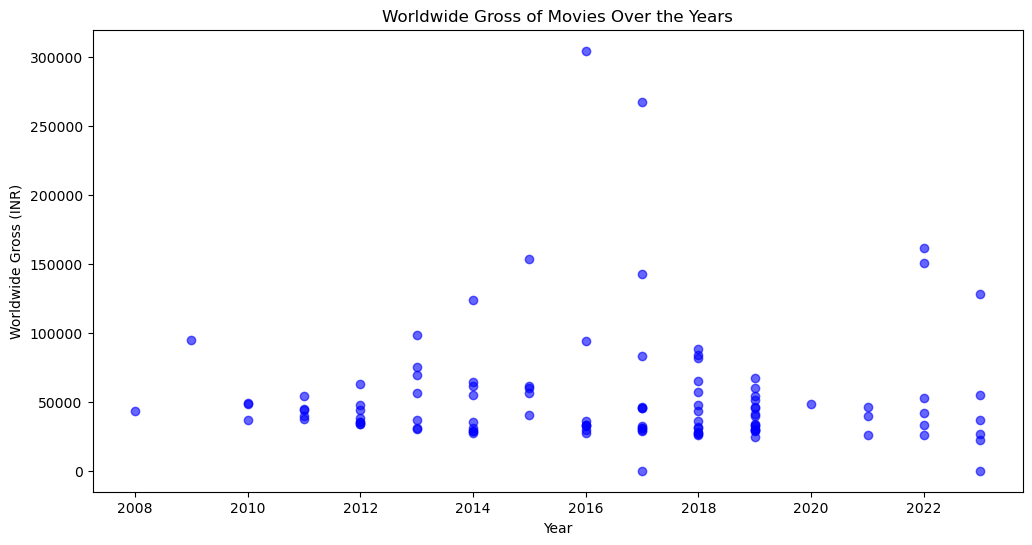

In [490]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_indian['Year'], df_indian['worldwide_gross'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (INR)')
plt.title('Worldwide Gross of Movies Over the Years')

# Show the plot
plt.show()


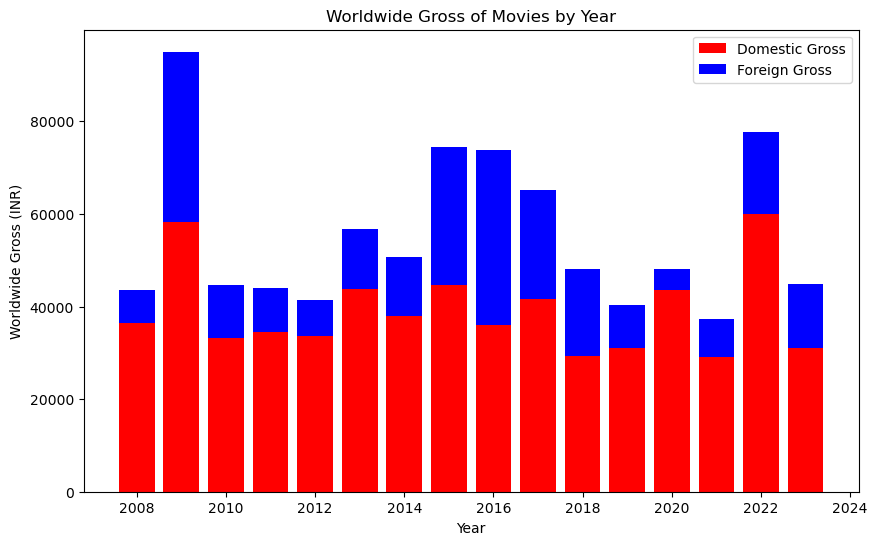

In [491]:
# First, group the data by 'Year' and calculate the sum for each year
yearly_data = df_indian.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (INR)')
plt.title('Worldwide Gross of Movies by Year')
plt.legend()

# Display the plot
plt.show()


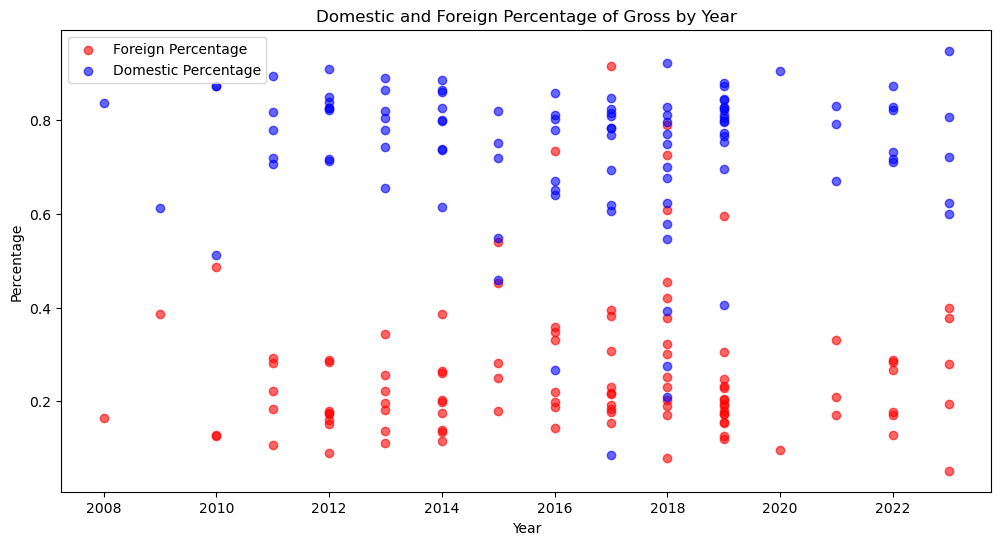

In [492]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot foreign_percentage in red
plt.scatter(df_indian['Year'], df_indian['foreign_percentage'], color='red', label='Foreign Percentage', alpha=0.6)

# Plot domestic_percentage in blue
plt.scatter(df_indian['Year'], df_indian['domestic_percentage'], color='blue', label='Domestic Percentage', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

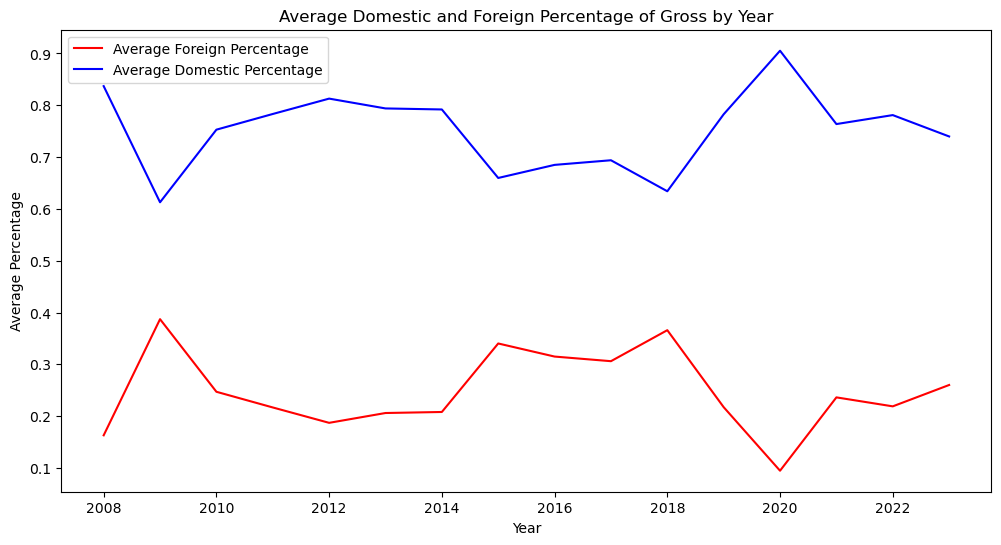

In [493]:
# Calculate the average foreign and domestic percentages for each year
average_percentages = df_indian.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

# Plot the averages
plt.figure(figsize=(12, 6))

# Plot foreign_percentage as a red line
plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

# Plot domestic_percentage as a blue line
plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()
